In [339]:
# !pip install lightgbm --user

In [340]:
import os
import numpy as np
import pandas as pd
from scipy.stats import rankdata
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

pd.set_option('display.max_columns',100)

In [341]:
b0_384_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b0_384_oof.csv')
b0_384_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b0_384_test.csv')

b0_512_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b0_512_oof.csv')
b0_512_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b0_512_test.csv')

b0_768_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b0_768_oof.csv')
b0_768_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b0_768_test.csv')

b1_384_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b1_384_oof.csv')
b1_384_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b1_384_test.csv')

b1_512_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b1_512_oof.csv')
b1_512_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b1_512_test.csv')

b1_768_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b1_768_oof.csv')
b1_768_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b1_768_test.csv')

b2_384_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b2_384_oof.csv')
b2_384_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b2_384_test.csv')

b2_512_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b2_512_oof.csv')
b2_512_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b2_512_test.csv')

b2_768_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b2_768_oof.csv')
b2_768_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b2_768_test.csv')

b3_384_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b3_384_oof.csv')
b3_384_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b3_384_test.csv')

b3_512_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b3_512_oof.csv')
b3_512_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b3_512_test.csv')

b3_768_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b3_768_oof.csv')
b3_768_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b3_768_test.csv')

b4_384_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b4_384_oof.csv')
b4_384_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b4_384_test.csv')

b4_512_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b4_512_oof.csv')
b4_512_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b4_512_test.csv')

b5_384_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b5_384_oof.csv')
b5_384_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b5_384_test.csv')

b5_512_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b5_512_oof.csv')
b5_512_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b5_512_test.csv')

b6_384_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b6_384_oof.csv')
b6_384_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b6_384_test.csv')

b6_512_oof = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b6_512_oof.csv')
b6_512_test = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\b6_512_test.csv')

meta_oof_no_rgb = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\meta_oof_no_rgb.csv')
meta_test_no_rgb = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\meta_test_no_rgb.csv')

# meta_oof_rgb = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\meta_oof_rgb.csv')
# meta_test_rgb = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input\Other\CSVs\meta_test_rgb.csv')

In [342]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

(get_df_name(b3_384_test))

'b3_384_test'

In [343]:
meta_oof_rgb.head()

,image_name,target,meta_o,folds
0,ISIC_2637011,0,-4.333145,0.0
1,ISIC_0015719,0,-4.348351,0.0
2,ISIC_0052212,0,-4.343954,0.0
3,ISIC_0068279,0,-3.679856,0.0
4,ISIC_0074268,0,-4.457565,0.0


In [344]:
OOF = b0_384_oof.copy()
OOF.drop('target',1,inplace=True)
Test = b0_384_test.copy()
OOF.rename(columns={'pred':'b0_384'},inplace=True)
Test.rename(columns={'target':'b0_384'},inplace=True)

for _df in [b0_512_oof, b0_512_test, b0_768_oof, b0_768_test, b1_384_oof, b1_384_test, b1_512_oof, 
                b1_512_test,b1_768_oof, b1_768_test, b2_384_oof, b2_384_test, b2_512_oof, b2_512_test, b2_768_oof,b2_768_test,
                b3_384_oof, b3_384_test, b3_512_oof, b3_512_test, b3_768_oof, b3_768_test, b4_384_oof, b4_384_test, b4_512_oof,
                b4_512_test, b5_384_oof, b5_384_test, b5_512_oof, b5_512_test, b6_384_oof, b6_384_test,b6_512_oof, b6_512_test,
            meta_oof_no_rgb,meta_test_no_rgb]:
    name = get_df_name(_df)
    if 'oof' in name:
        print(name)
        name = get_df_name(_df)[:6]
        _df.rename(columns={'pred':(name)},inplace=True)
        OOF = pd.merge(OOF,_df[['image_name',(name)]],on='image_name',how='left')
    else:
        print(name)
        name = get_df_name(_df)[:6]
        _df.rename(columns={'target':(name)},inplace=True)
        Test = pd.merge(Test,_df[['image_name',(name)]],on='image_name',how='left')

b0_512_oof
b0_512_test
b0_768_oof
b0_768_test
b1_384_oof
b1_384_test
b1_512_oof
b1_512_test
b1_768_oof
b1_768_test
b2_384_oof
b2_384_test
b2_512_oof
b2_512_test
b2_768_oof
b2_768_test
b3_384_oof
b3_384_test
b3_512_oof
b3_512_test
b3_768_oof
b3_768_test
b4_384_oof
b4_384_test
b4_512_oof
b4_512_test
b5_384_oof
b5_384_test
b5_512_oof
b5_512_test
b6_384_oof
b6_384_test
b6_512_oof
b6_512_test
meta_oof_no_rgb
meta_test_no_rgb


In [345]:
Test.shape

(10982, 20)

In [346]:
OOF.shape

(32692, 21)

In [347]:
OOF_B3_512 = np.load(r'C:\Users\Kaggle\Melanoma\stacking\input/OOF_B3_512.npy')
OOF_B4_384 = np.load(r'C:\Users\Kaggle\Melanoma\stacking\input/OOF_B4_384.npy')
OOF_B4_512 = np.load(r'C:\Users\Kaggle\Melanoma\stacking\input/OOF_B4_512.npy')
OOF_B4_768 = np.load(r'C:\Users\Kaggle\Melanoma\stacking\input/OOF_B4_768.npy')
OOF_B5_512 = np.load(r'C:\Users\Kaggle\Melanoma\stacking\input/OOF_B5_512.npy')
OOF_B5_512_on_384_imgsz = np.load(r'C:\Users\Kaggle\Melanoma\stacking\input/OOF_B5_512_on_384_imgsz.npy')
OOF_8_Class = np.load(r'C:\Users\Kaggle\Melanoma\stacking\input/OOF_NewClassifier_512.npy')


test_B3_512 = np.load(r'C:\Users\Kaggle\Melanoma\stacking\input/test_preds_B3_512.npy').reshape(-1,1)
test_B4_384 = np.load(r'C:\Users\Kaggle\Melanoma\stacking\input/test_preds_B4_384.npy').reshape(-1,1)
test_B4_512 = np.load(r'C:\Users\Kaggle\Melanoma\stacking\input/test_preds_B4_512.npy').reshape(-1,1)
test_B4_768 = np.load(r'C:\Users\Kaggle\Melanoma\stacking\input/test_preds_B4_768.npy').reshape(-1,1)
test_B5_512 = np.load(r'C:\Users\Kaggle\Melanoma\stacking\input/test_preds_B5_512.npy').reshape(-1,1)
test_B5_512_on_384_imgsz = np.load(r'C:\Users\Kaggle\Melanoma\stacking\input/test_preds_B5_512.npy').reshape(-1,1)
test_8_Class = np.load(r'C:\Users\Kaggle\Melanoma\stacking\input/test_preds_NewClassifier_512.npy').reshape(-1,8)

mapping = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input/New_Mapper_01082020.csv')
mapping = mapping[mapping['tfrecord']!=-1].reset_index(drop=True)

In [348]:
test_B3_512.shape,OOF_B3_512.shape,OOF_8_Class.shape,test_8_Class.shape

((10982, 1), (58544, 1), (58544, 8), (10982, 8))

In [349]:
ArrOOF = np.hstack((OOF_B3_512,OOF_B4_384,OOF_B4_512,OOF_B4_768,OOF_B5_512,OOF_B5_512_on_384_imgsz,OOF_8_Class))
Arrtest = np.hstack((test_B3_512,test_B4_384,test_B4_512,test_B4_768,test_B5_512,test_B5_512_on_384_imgsz,test_8_Class))

In [350]:
ArrOOF.shape,Arrtest.shape

((58544, 14), (10982, 14))

In [351]:
mapping['benign_malignant'].unique()

array(['benign', 'malignant'], dtype=object)

In [352]:
mapping.shape,ArrOOF.shape,Arrtest.shape

((58544, 13), (58544, 14), (10982, 14))

In [353]:
DF_OOF = pd.concat([mapping,pd.DataFrame(ArrOOF)],1)
DF_TEST = pd.concat([pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input/test.csv'),pd.DataFrame(Arrtest)],1)

DF_OOF.rename(columns={0:'Model_1',1:'Model_2',2:'Model_3',3:'Model_4',4:'Model_5',5:'Model_6',
                       6:'Class_0',7:'Class_1',8:'Class_2',9:'Class_3',10:'Class_4',11:'Class_5',
                       12:'Class_6',13:'Class_7',
                      },inplace=True)


DF_TEST.rename(columns={0:'Model_1',1:'Model_2',2:'Model_3',3:'Model_4',4:'Model_5',5:'Model_6',
                       6:'Class_0',7:'Class_1',8:'Class_2',9:'Class_3',10:'Class_4',11:'Class_5',
                       12:'Class_6',13:'Class_7',
                       },inplace=True)

In [354]:
DF_OOF=DF_OOF[DF_OOF['Is 2020']==1].reset_index(drop=True)
DF_OOF.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,Is 2020,Is New External,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,1,0,-7.371904,-5.750886,-9.630100,-11.695201,-8.120071,-6.788356,-3.148065,0.277408,-1.620457,-5.759659,-5.864739,-5.289987,-4.922071,-3.542490
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,1,0,-8.008818,-7.512016,-7.696969,-9.020242,-9.597056,-7.104296,-8.283650,-7.476695,-6.510182,-7.408641,-5.514200,4.480520,-10.514550,-7.479452
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,1,0,-10.885904,-7.895567,-12.422218,-12.833864,-13.479432,-11.883525,-13.079991,-12.843904,-11.838941,-12.140681,-12.817436,10.667089,-12.019982,-13.718756
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,1,0,-3.616970,-5.671000,-6.943462,-4.453280,-8.095472,-8.160951,-9.405870,-8.742830,-4.260899,-11.340512,-5.713978,4.229252,-11.918234,-9.126487
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,1,0,-7.931056,-8.626996,-11.001554,-12.395753,-11.055078,-10.776115,-8.097995,-10.726409,4.743939,-7.644479,-11.169747,-6.107116,-12.271606,-9.591165


In [355]:
DF_OOF = pd.merge(DF_OOF,OOF,on='image_name',how='left')
DF_TEST = pd.merge(DF_TEST,Test,on='image_name',how='left')

In [356]:
DF_OOF.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,Is 2020,Is New External,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,b0_384,folds,b0_512,b0_768,b1_384,b1_512,b1_768,b2_384,b2_512,b2_768,b3_384,b3_512,b3_768,b4_384,b4_512,b5_384,b5_512,b6_384,b6_512,meta_o
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,1,0,-7.371904,-5.750886,-9.630100,-11.695201,-8.120071,-6.788356,-3.148065,0.277408,-1.620457,-5.759659,-5.864739,-5.289987,-4.922071,-3.542490,1.040243e-04,0.0,1.301787e-02,6.536822e-05,3.619254e-02,1.876724e-06,1.241671e-02,1.173260e-04,8.544180e-04,1.005649e-04,8.379662e-03,1.908565e-04,7.779223e-02,4.906306e-07,1.340904e-06,4.601422e-03,1.924394e-04,3.856163e-05,2.691961e-03,-4.038257
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,1,0,-8.008818,-7.512016,-7.696969,-9.020242,-9.597056,-7.104296,-8.283650,-7.476695,-6.510182,-7.408641,-5.514200,4.480520,-10.514550,-7.479452,9.510262e-09,0.0,9.605431e-09,2.692684e-07,2.710132e-07,1.917436e-08,1.366492e-04,8.315782e-10,5.576348e-08,1.193592e-06,1.939857e-08,1.348354e-07,3.371309e-06,1.595523e-07,1.574226e-07,2.876224e-06,3.107002e-09,2.950525e-07,2.020544e-06,-4.040699
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,1,0,-10.885904,-7.895567,-12.422218,-12.833864,-13.479432,-11.883525,-13.079991,-12.843904,-11.838941,-12.140681,-12.817436,10.667089,-12.019982,-13.718756,3.198642e-07,4.0,7.460470e-08,9.557192e-07,1.407242e-05,3.160738e-08,1.326743e-07,2.804807e-06,2.157762e-08,3.575905e-07,5.053700e-05,4.256739e-09,3.585320e-04,9.837190e-07,1.275535e-07,9.730710e-06,1.427682e-07,2.298812e-08,1.369407e-07,-4.038779
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,1,0,-3.616970,-5.671000,-6.943462,-4.453280,-8.095472,-8.160951,-9.405870,-8.742830,-4.260899,-11.340512,-5.713978,4.229252,-11.918234,-9.126487,3.672041e-01,0.0,3.518556e-01,4.540461e-01,1.191925e-02,2.787355e-01,1.606390e-01,2.938546e-01,2.077667e-01,1.537110e-01,1.085059e-01,3.991534e-02,7.217529e-03,4.784299e-02,8.704583e-02,3.153467e-01,6.779967e-02,1.793320e-01,8.146382e-02,-4.046581
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,1,0,-7.931056,-8.626996,-11.001554,-12.395753,-11.055078,-10.776115,-8.097995,-10.726409,4.743939,-7.644479,-11.169747,-6.107116,-12.271606,-9.591165,2.233256e-09,0.0,1.624496e-08,6.170695e-08,6.245854e-11,7.950217e-08,6.881624e-05,8.370323e-09,2.787761e-08,8.423865e-07,7.214270e-10,2.217705e-08,1.776847e-08,3.544467e-10,1.385682e-08,8.733671e-07,1.489570e-09,1.280467e-06,5.522525e-07,-4.039640


In [357]:
DF_TEST.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,b0_384,b0_512,b0_768,b1_384,b1_512,b1_768,b2_384,b2_512,b2_768,b3_384,b3_512,b3_768,b4_384,b4_512,b5_384,b5_512,b6_384,b6_512,meta_t
0,ISIC_0052060,IP_3579794,male,70.0,NaN,-8.909468,-8.433225,-9.129875,-11.646298,-8.377275,-8.377275,-10.024507,-9.391894,-7.798132,-11.013197,-10.176077,2.887277,-10.255258,-4.057807,0.000003,4.476910e-07,0.001489,0.000093,2.898079e-06,0.003034,3.818551e-07,7.496825e-07,0.000611,0.001465,2.090434e-05,0.000024,9.280100e-07,0.000002,0.000029,3.371156e-06,2.552468e-06,0.000646,-4.004107
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,-8.455880,-7.954571,-9.448328,-12.435794,-9.057093,-9.057093,-10.428141,-11.338403,-9.917723,-10.706883,-9.203602,7.442840,-12.149224,-11.422884,0.000012,2.930194e-06,0.000471,0.000020,4.044543e-06,0.000760,3.657774e-07,9.055269e-07,0.000923,0.000016,3.359506e-07,0.000094,2.739570e-06,0.000003,0.000007,1.570326e-07,6.682585e-07,0.000006,-4.045560
2,ISIC_0058510,IP_7960270,female,55.0,torso,-7.803973,-7.414011,-10.403407,-9.018628,-9.403374,-9.403374,-3.669427,-3.821315,-1.290675,-5.984470,-4.169901,-0.291706,-4.582135,-6.858476,0.000048,1.278697e-05,0.000144,0.000206,8.486741e-06,0.000179,1.306843e-05,2.508822e-06,0.000133,0.000099,2.883144e-05,0.000547,1.003727e-04,0.000107,0.000025,2.731285e-07,2.735266e-05,0.000039,-4.041269
3,ISIC_0073313,IP_6375035,female,50.0,torso,-11.226604,-8.859750,-15.448914,-15.247586,-10.820011,-10.820011,-8.086062,-6.941946,-0.617339,-8.445068,-6.465442,0.575849,-9.684353,-7.874601,0.000025,1.548593e-06,0.000455,0.000006,1.458777e-07,0.000166,4.763287e-07,2.255768e-06,0.000538,0.000208,9.444142e-07,0.000151,2.412951e-06,0.000030,0.000007,2.613504e-07,6.846822e-06,0.000008,-4.047988
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,-6.433666,-5.498871,-8.065044,-9.137465,-6.773607,-6.773607,-11.937092,-10.342753,-9.017074,-14.191023,-11.326660,7.802586,-11.660651,-10.919193,0.003287,9.346322e-03,0.098772,0.056097,6.712221e-03,0.132988,1.609418e-03,9.562611e-03,0.132113,0.043259,1.835345e-03,0.088705,1.990880e-03,0.004592,0.041503,2.407849e-02,1.639809e-03,0.038976,-4.002409


In [358]:
# DF_OOF.rename(columns={'meta_o_x':'meta_1','meta_o_y':'meta_2'},inplace=True)
# DF_TEST.rename(columns={'meta_t_x':'meta_1','meta_t_y':'meta_2'},inplace=True)

DF_OOF.rename(columns={'meta_o':'meta_1'},inplace=True)
DF_TEST.rename(columns={'meta_t':'meta_1'},inplace=True)

In [359]:
### feat Engg --- fill in patient ID == -1 with image name

DF_OOF.loc[DF_OOF['patient_id']=='-1','patient_id'] = DF_OOF.loc[DF_OOF['patient_id']=='-1','image_name']
DF_TEST.loc[DF_TEST['patient_id']=='-1','patient_id'] = DF_TEST.loc[DF_TEST['patient_id']=='-1','image_name']

In [360]:
for df in [DF_OOF, DF_TEST]:
    df['anatom_site_general_challenge'].fillna('unknown_site', inplace=True)

DF_OOF['sex'].fillna(DF_OOF['sex'].mode()[0], inplace=True)
DF_OOF['age_approx'].fillna(DF_OOF['age_approx'].median(), inplace=True) 

In [361]:
print(
    f'Train missing value count: {DF_OOF.isnull().sum().sum()}\nTest missing value count: {DF_TEST.isnull().sum().sum()}'
)

Train missing value count: 0
Test missing value count: 0


In [362]:
DF_OOF.isnull().sum(0)

image_name                       0
patient_id                       0
sex                              0
age_approx                       0
anatom_site_general_challenge    0
diagnosis                        0
benign_malignant                 0
target                           0
tfrecord                         0
width                            0
height                           0
Is 2020                          0
Is New External                  0
Model_1                          0
Model_2                          0
Model_3                          0
Model_4                          0
Model_5                          0
Model_6                          0
Class_0                          0
Class_1                          0
Class_2                          0
Class_3                          0
Class_4                          0
Class_5                          0
Class_6                          0
Class_7                          0
b0_384                           0
folds               

In [363]:
DF_OOF['age_min'] = DF_OOF['patient_id'].map(DF_OOF.groupby(['patient_id']).age_approx.min())
DF_OOF['age_max'] = DF_OOF['patient_id'].map(DF_OOF.groupby(['patient_id']).age_approx.max())

DF_TEST['age_min'] = DF_TEST['patient_id'].map(DF_TEST.groupby(['patient_id']).age_approx.min())
DF_TEST['age_max'] = DF_TEST['patient_id'].map(DF_TEST.groupby(['patient_id']).age_approx.max())

In [364]:
DF_OOF['n_images'] = DF_OOF.patient_id.map(DF_OOF.groupby(['patient_id']).image_name.count())
DF_TEST['n_images'] = DF_TEST.patient_id.map(DF_TEST.groupby(['patient_id']).image_name.count())

In [365]:
DF_OOF.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,Is 2020,Is New External,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,b0_384,folds,b0_512,b0_768,b1_384,b1_512,b1_768,b2_384,b2_512,b2_768,b3_384,b3_512,b3_768,b4_384,b4_512,b5_384,b5_512,b6_384,b6_512,meta_1,age_min,age_max,n_images
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,1,0,-7.371904,-5.750886,-9.630100,-11.695201,-8.120071,-6.788356,-3.148065,0.277408,-1.620457,-5.759659,-5.864739,-5.289987,-4.922071,-3.542490,1.040243e-04,0.0,1.301787e-02,6.536822e-05,3.619254e-02,1.876724e-06,1.241671e-02,1.173260e-04,8.544180e-04,1.005649e-04,8.379662e-03,1.908565e-04,7.779223e-02,4.906306e-07,1.340904e-06,4.601422e-03,1.924394e-04,3.856163e-05,2.691961e-03,-4.038257,45.0,45.0,115
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,1,0,-8.008818,-7.512016,-7.696969,-9.020242,-9.597056,-7.104296,-8.283650,-7.476695,-6.510182,-7.408641,-5.514200,4.480520,-10.514550,-7.479452,9.510262e-09,0.0,9.605431e-09,2.692684e-07,2.710132e-07,1.917436e-08,1.366492e-04,8.315782e-10,5.576348e-08,1.193592e-06,1.939857e-08,1.348354e-07,3.371309e-06,1.595523e-07,1.574226e-07,2.876224e-06,3.107002e-09,2.950525e-07,2.020544e-06,-4.040699,45.0,45.0,24
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,1,0,-10.885904,-7.895567,-12.422218,-12.833864,-13.479432,-11.883525,-13.079991,-12.843904,-11.838941,-12.140681,-12.817436,10.667089,-12.019982,-13.718756,3.198642e-07,4.0,7.460470e-08,9.557192e-07,1.407242e-05,3.160738e-08,1.326743e-07,2.804807e-06,2.157762e-08,3.575905e-07,5.053700e-05,4.256739e-09,3.585320e-04,9.837190e-07,1.275535e-07,9.730710e-06,1.427682e-07,2.298812e-08,1.369407e-07,-4.038779,50.0,55.0,5
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,1,0,-3.616970,-5.671000,-6.943462,-4.453280,-8.095472,-8.160951,-9.405870,-8.742830,-4.260899,-11.340512,-5.713978,4.229252,-11.918234,-9.126487,3.672041e-01,0.0,3.518556e-01,4.540461e-01,1.191925e-02,2.787355e-01,1.606390e-01,2.938546e-01,2.077667e-01,1.537110e-01,1.085059e-01,3.991534e-02,7.217529e-03,4.784299e-02,8.704583e-02,3.153467e-01,6.779967e-02,1.793320e-01,8.146382e-02,-4.046581,40.0,45.0,22
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,1,0,-7.931056,-8.626996,-11.001554,-12.395753,-11.055078,-10.776115,-8.097995,-10.726409,4.743939,-7.644479,-11.169747,-6.107116,-12.271606,-9.591165,2.233256e-09,0.0,1.624496e-08,6.170695e-08,6.245854e-11,7.950217e-08,6.881624e-05,8.370323e-09,2.787761e-08,8.423865e-07,7.214270e-10,2.217705e-08,1.776847e-08,3.544467e-10,1.385682e-08,8.733671e-07,1.489570e-09,1.280467e-06,5.522525e-07,-4.039640,55.0,55.0,20


In [366]:
MoreCols = ['b0_384','b0_512','b0_768','b1_384','b1_512','b1_768','b2_384',
            'b2_512','b2_768','b3_384','b3_512','b3_768','b4_384',
            'b4_512','b5_384','b5_512','b6_384','b6_512','meta_1']

In [367]:
DF_OOF.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,Is 2020,Is New External,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,b0_384,folds,b0_512,b0_768,b1_384,b1_512,b1_768,b2_384,b2_512,b2_768,b3_384,b3_512,b3_768,b4_384,b4_512,b5_384,b5_512,b6_384,b6_512,meta_1,age_min,age_max,n_images
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,1,0,-7.371904,-5.750886,-9.630100,-11.695201,-8.120071,-6.788356,-3.148065,0.277408,-1.620457,-5.759659,-5.864739,-5.289987,-4.922071,-3.542490,1.040243e-04,0.0,1.301787e-02,6.536822e-05,3.619254e-02,1.876724e-06,1.241671e-02,1.173260e-04,8.544180e-04,1.005649e-04,8.379662e-03,1.908565e-04,7.779223e-02,4.906306e-07,1.340904e-06,4.601422e-03,1.924394e-04,3.856163e-05,2.691961e-03,-4.038257,45.0,45.0,115
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,1,0,-8.008818,-7.512016,-7.696969,-9.020242,-9.597056,-7.104296,-8.283650,-7.476695,-6.510182,-7.408641,-5.514200,4.480520,-10.514550,-7.479452,9.510262e-09,0.0,9.605431e-09,2.692684e-07,2.710132e-07,1.917436e-08,1.366492e-04,8.315782e-10,5.576348e-08,1.193592e-06,1.939857e-08,1.348354e-07,3.371309e-06,1.595523e-07,1.574226e-07,2.876224e-06,3.107002e-09,2.950525e-07,2.020544e-06,-4.040699,45.0,45.0,24
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,1,0,-10.885904,-7.895567,-12.422218,-12.833864,-13.479432,-11.883525,-13.079991,-12.843904,-11.838941,-12.140681,-12.817436,10.667089,-12.019982,-13.718756,3.198642e-07,4.0,7.460470e-08,9.557192e-07,1.407242e-05,3.160738e-08,1.326743e-07,2.804807e-06,2.157762e-08,3.575905e-07,5.053700e-05,4.256739e-09,3.585320e-04,9.837190e-07,1.275535e-07,9.730710e-06,1.427682e-07,2.298812e-08,1.369407e-07,-4.038779,50.0,55.0,5
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,1,0,-3.616970,-5.671000,-6.943462,-4.453280,-8.095472,-8.160951,-9.405870,-8.742830,-4.260899,-11.340512,-5.713978,4.229252,-11.918234,-9.126487,3.672041e-01,0.0,3.518556e-01,4.540461e-01,1.191925e-02,2.787355e-01,1.606390e-01,2.938546e-01,2.077667e-01,1.537110e-01,1.085059e-01,3.991534e-02,7.217529e-03,4.784299e-02,8.704583e-02,3.153467e-01,6.779967e-02,1.793320e-01,8.146382e-02,-4.046581,40.0,45.0,22
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,1,0,-7.931056,-8.626996,-11.001554,-12.395753,-11.055078,-10.776115,-8.097995,-10.726409,4.743939,-7.644479,-11.169747,-6.107116,-12.271606,-9.591165,2.233256e-09,0.0,1.624496e-08,6.170695e-08,6.245854e-11,7.950217e-08,6.881624e-05,8.370323e-09,2.787761e-08,8.423865e-07,7.214270e-10,2.217705e-08,1.776847e-08,3.544467e-10,1.385682e-08,8.733671e-07,1.489570e-09,1.280467e-06,5.522525e-07,-4.039640,55.0,55.0,20


In [368]:
from sklearn.preprocessing import LabelEncoder

trcols = ['image_name','patient_id','sex','age_approx','anatom_site_general_challenge',
          'target','age_min','age_max','n_images','tfrecord',
          'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6',
           'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Is 2020']+MoreCols
tecols = ['image_name','patient_id','sex','age_approx','anatom_site_general_challenge',
          'age_min','age_max','n_images','Model_1','Model_2','Model_3','Model_4','Model_5','Model_6',
          'Class_0','Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7']+MoreCols


DF_OOF = DF_OOF[trcols]
DF_TEST = DF_TEST[tecols]

In [369]:
DF_TEST.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,age_min,age_max,n_images,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,b0_384,b0_512,b0_768,b1_384,b1_512,b1_768,b2_384,b2_512,b2_768,b3_384,b3_512,b3_768,b4_384,b4_512,b5_384,b5_512,b6_384,b6_512,meta_1
0,ISIC_0052060,IP_3579794,male,70.0,unknown_site,70.0,70.0,240,-8.909468,-8.433225,-9.129875,-11.646298,-8.377275,-8.377275,-10.024507,-9.391894,-7.798132,-11.013197,-10.176077,2.887277,-10.255258,-4.057807,0.000003,4.476910e-07,0.001489,0.000093,2.898079e-06,0.003034,3.818551e-07,7.496825e-07,0.000611,0.001465,2.090434e-05,0.000024,9.280100e-07,0.000002,0.000029,3.371156e-06,2.552468e-06,0.000646,-4.004107
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,40.0,40.0,46,-8.455880,-7.954571,-9.448328,-12.435794,-9.057093,-9.057093,-10.428141,-11.338403,-9.917723,-10.706883,-9.203602,7.442840,-12.149224,-11.422884,0.000012,2.930194e-06,0.000471,0.000020,4.044543e-06,0.000760,3.657774e-07,9.055269e-07,0.000923,0.000016,3.359506e-07,0.000094,2.739570e-06,0.000003,0.000007,1.570326e-07,6.682585e-07,0.000006,-4.045560
2,ISIC_0058510,IP_7960270,female,55.0,torso,55.0,55.0,28,-7.803973,-7.414011,-10.403407,-9.018628,-9.403374,-9.403374,-3.669427,-3.821315,-1.290675,-5.984470,-4.169901,-0.291706,-4.582135,-6.858476,0.000048,1.278697e-05,0.000144,0.000206,8.486741e-06,0.000179,1.306843e-05,2.508822e-06,0.000133,0.000099,2.883144e-05,0.000547,1.003727e-04,0.000107,0.000025,2.731285e-07,2.735266e-05,0.000039,-4.041269
3,ISIC_0073313,IP_6375035,female,50.0,torso,50.0,50.0,38,-11.226604,-8.859750,-15.448914,-15.247586,-10.820011,-10.820011,-8.086062,-6.941946,-0.617339,-8.445068,-6.465442,0.575849,-9.684353,-7.874601,0.000025,1.548593e-06,0.000455,0.000006,1.458777e-07,0.000166,4.763287e-07,2.255768e-06,0.000538,0.000208,9.444142e-07,0.000151,2.412951e-06,0.000030,0.000007,2.613504e-07,6.846822e-06,0.000008,-4.047988
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,40.0,65.0,29,-6.433666,-5.498871,-8.065044,-9.137465,-6.773607,-6.773607,-11.937092,-10.342753,-9.017074,-14.191023,-11.326660,7.802586,-11.660651,-10.919193,0.003287,9.346322e-03,0.098772,0.056097,6.712221e-03,0.132988,1.609418e-03,9.562611e-03,0.132113,0.043259,1.835345e-03,0.088705,1.990880e-03,0.004592,0.041503,2.407849e-02,1.639809e-03,0.038976,-4.002409


In [370]:
def label_encode(train, test):
    lbe = LabelEncoder()
    lbe.fit(train.values)
    train = lbe.transform(train.values)
    test = lbe.transform(test.values)
    return lbe,train,test


for col in ['sex','anatom_site_general_challenge']:
    _,DF_OOF[col],DF_TEST[col]= label_encode(DF_OOF[col],DF_TEST[col])

In [371]:
DF_OOF['Age_mm_Ratio'] = DF_OOF['age_max']/DF_OOF['age_min']
DF_TEST['Age_mm_Ratio'] = DF_TEST['age_max']/DF_TEST['age_min']

DF_OOF['Age_mmV_Ratio'] = DF_OOF['age_approx']/DF_OOF['age_max']
DF_TEST['Age_mmV_Ratio'] = DF_TEST['age_approx']/DF_TEST['age_max']

DF_OOF['Age_mmVE_Ratio'] = DF_OOF['age_approx']/DF_OOF['age_min']
DF_TEST['Age_mmVE_Ratio'] = DF_TEST['age_approx']/DF_TEST['age_min']

In [372]:
foldMapping = {0:[0,9,11],
               1:[5,8,13],
               2:[1,2,14],
               3:[4,7,10],
               4:[3,6,12]
              }

In [373]:
DF_OOF['Is 2020'].unique()

array([1], dtype=int64)

In [374]:
# DF_OOF['Model_1'] = pd.DataFrame.rank(DF_OOF['Model_1'])
# DF_OOF['Model_2'] = pd.DataFrame.rank(DF_OOF['Model_2'])
# DF_OOF['Model_3'] = pd.DataFrame.rank(DF_OOF['Model_3'])
# DF_OOF['Model_4'] = pd.DataFrame.rank(DF_OOF['Model_4'])
# DF_OOF['Model_5'] = pd.DataFrame.rank(DF_OOF['Model_5'])
# DF_OOF['Model_6'] = pd.DataFrame.rank(DF_OOF['Model_6'])


# DF_TEST['Model_1'] = pd.DataFrame.rank(DF_TEST['Model_1'])
# DF_TEST['Model_2'] = pd.DataFrame.rank(DF_TEST['Model_2'])
# DF_TEST['Model_3'] = pd.DataFrame.rank(DF_TEST['Model_3'])
# DF_TEST['Model_4'] = pd.DataFrame.rank(DF_TEST['Model_4'])
# DF_TEST['Model_5'] = pd.DataFrame.rank(DF_TEST['Model_5'])
# DF_TEST['Model_6'] = pd.DataFrame.rank(DF_TEST['Model_6'])

In [375]:
# normCols = ['n_images', 'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6',
#            'Class_0','Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7']+MoreCols

# for cc in normCols:
#     DF_OOF[cc] = (DF_OOF[cc]-DF_OOF[cc].mean())/np.std(DF_OOF[cc])
#     DF_TEST[cc] = (DF_TEST[cc]-DF_TEST[cc].mean())/np.std(DF_TEST[cc])

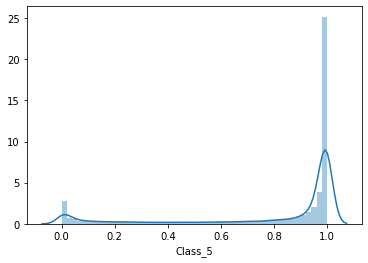

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(DF_OOF['Class_5'].apply(lambda x: 1/(1+np.exp(-x))))
plt.show()

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


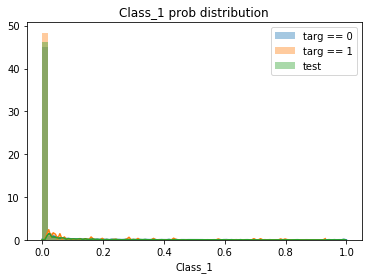

In [377]:
import seaborn as sns

cca = 'Class_1'
sns.distplot(DF_OOF[DF_OOF['target']==0][DF_OOF['Is 2020']==1][cca].apply(lambda x: 1/(1+np.exp(-x))),label="targ == 0")
sns.distplot(DF_OOF[DF_OOF['target']==1][DF_OOF['Is 2020']==1][cca].apply(lambda x: 1/(1+np.exp(-x))),label="targ == 1")
sns.distplot(DF_TEST[cca].apply(lambda x: 1/(1+np.exp(-x))),label="test")
plt.legend()
plt.title(f"{cca} prob distribution");

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


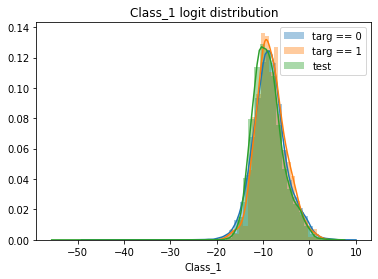

In [378]:
cca = 'Class_1'
sns.distplot(DF_OOF[DF_OOF['target']==0][DF_OOF['Is 2020']==1][cca],label="targ == 0")
sns.distplot(DF_OOF[DF_OOF['target']==1][DF_OOF['Is 2020']==1][cca],label="targ == 1")
sns.distplot(DF_TEST[cca],label="test")
plt.legend()
plt.title(f"{cca} logit distribution");

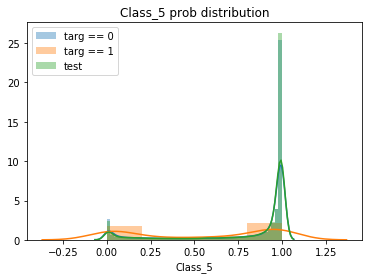

In [379]:
import seaborn as sns

cca = 'Class_5'
sns.distplot(DF_OOF[DF_OOF['target']==0][cca].apply(lambda x: 1/(1+np.exp(-x))),label="targ == 0")
sns.distplot(DF_OOF[DF_OOF['target']==1][cca].apply(lambda x: 1/(1+np.exp(-x))),label="targ == 1")
sns.distplot(DF_TEST[cca].apply(lambda x: 1/(1+np.exp(-x))),label="test")
plt.legend()
plt.title(f"{cca} prob distribution");

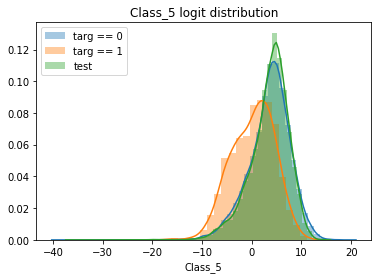

In [380]:
sns.distplot(DF_OOF[DF_OOF['target']==0][cca],label="targ == 0")
sns.distplot(DF_OOF[DF_OOF['target']==1][cca],label="targ == 1")
sns.distplot(DF_TEST[cca],label="test")
plt.legend()
plt.title(f"{cca} logit distribution");

In [381]:
### change logits to probs, dist of much better

convert2probs =  ['Model_1','Model_2','Model_3','Model_4','Model_5','Model_6',
                  'Class_0','Class_1','Class_2','Class_3','Class_4',
                  'Class_5','Class_6','Class_7','meta_1']

for cc in convert2probs:
    DF_OOF[cc] = DF_OOF[cc].apply(lambda x: 1/(1+np.exp(-x)))
    DF_TEST[cc] = DF_TEST[cc].apply(lambda x: 1/(1+np.exp(-x)))
    
    
DF_OOF['Engg_1'] = np.max(DF_OOF[['Class_4','Class_5']],1)
DF_TEST['Engg_1'] = np.max(DF_TEST[['Class_4','Class_5']],1)

DF_OOF['Engg_2'] = np.min(DF_OOF[['Class_4','Class_5']],1)
DF_TEST['Engg_2'] = np.min(DF_TEST[['Class_4','Class_5']],1)

DF_OOF['Engg_3'] = np.diff(DF_OOF[['Class_4','Class_5']],1)
DF_TEST['Engg_3'] = np.diff(DF_TEST[['Class_4','Class_5']],1)


C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


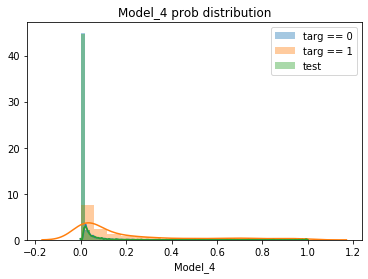

In [382]:
cca = 'Model_4'
sns.distplot(DF_OOF[DF_OOF['target']==0][DF_OOF['Is 2020']==1][cca],label="targ == 0")
sns.distplot(DF_OOF[DF_OOF['target']==1][DF_OOF['Is 2020']==1][cca],label="targ == 1")
sns.distplot(DF_TEST[cca],label="test")
plt.legend()
plt.title(f"{cca} prob distribution");

In [383]:
params = {'learning_rate': 0.007,
      'num_leaves': 15,
      'max_bin': 1023,
      'min_child_samples': 700,
      'reg_alpha': 0.1,
      'reg_lambda': 0.2,
      'feature_fraction': 1,
      'bagging_freq': 1,
      'metric':'auc',
      'bagging_fraction': 0.85,
      'objective': 'binary',
      'n_jobs': -1,
      'n_estimators':10000,
      'random_state':42 }

In [384]:
DF_OOF.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,target,age_min,age_max,n_images,tfrecord,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Is 2020,b0_384,b0_512,b0_768,b1_384,b1_512,b1_768,b2_384,b2_512,b2_768,b3_384,b3_512,b3_768,b4_384,b4_512,b5_384,b5_512,b6_384,b6_512,meta_1,Age_mm_Ratio,Age_mmV_Ratio,Age_mmVE_Ratio,Engg_1,Engg_2,Engg_3
0,ISIC_2637011,IP_7279968,1,45.0,0,0,45.0,45.0,115,0,0.000628,0.003170,0.000066,0.000008,0.000297,0.001126,0.041168,0.568911,0.165142,0.003142,0.002830,0.005017,0.007231,0.028127,1,1.040243e-04,1.301787e-02,6.536822e-05,3.619254e-02,1.876724e-06,1.241671e-02,1.173260e-04,8.544180e-04,1.005649e-04,8.379662e-03,1.908565e-04,7.779223e-02,4.906306e-07,1.340904e-06,4.601422e-03,1.924394e-04,3.856163e-05,2.691961e-03,0.017323,1.000,1.000000,1.000,0.005017,0.002830,0.002187
1,ISIC_0015719,IP_3075186,0,45.0,6,0,45.0,45.0,24,0,0.000332,0.000546,0.000454,0.000121,0.000068,0.000821,0.000253,0.000566,0.001486,0.000606,0.004013,0.988799,0.000027,0.000564,1,9.510262e-09,9.605431e-09,2.692684e-07,2.710132e-07,1.917436e-08,1.366492e-04,8.315782e-10,5.576348e-08,1.193592e-06,1.939857e-08,1.348354e-07,3.371309e-06,1.595523e-07,1.574226e-07,2.876224e-06,3.107002e-09,2.950525e-07,2.020544e-06,0.017281,1.000,1.000000,1.000,0.988799,0.004013,0.984786
2,ISIC_0052212,IP_2842074,0,50.0,1,0,50.0,55.0,5,6,0.000019,0.000372,0.000004,0.000003,0.000001,0.000007,0.000002,0.000003,0.000007,0.000005,0.000003,0.999977,0.000006,0.000001,1,3.198642e-07,7.460470e-08,9.557192e-07,1.407242e-05,3.160738e-08,1.326743e-07,2.804807e-06,2.157762e-08,3.575905e-07,5.053700e-05,4.256739e-09,3.585320e-04,9.837190e-07,1.275535e-07,9.730710e-06,1.427682e-07,2.298812e-08,1.369407e-07,0.017314,1.100,0.909091,1.000,0.999977,0.000003,0.999974
3,ISIC_0068279,IP_6890425,0,45.0,0,0,40.0,45.0,22,0,0.026161,0.003433,0.000964,0.011506,0.000305,0.000286,0.000082,0.000160,0.013913,0.000012,0.003289,0.985646,0.000007,0.000109,1,3.672041e-01,3.518556e-01,4.540461e-01,1.191925e-02,2.787355e-01,1.606390e-01,2.938546e-01,2.077667e-01,1.537110e-01,1.085059e-01,3.991534e-02,7.217529e-03,4.784299e-02,8.704583e-02,3.153467e-01,6.779967e-02,1.793320e-01,8.146382e-02,0.017182,1.125,1.000000,1.125,0.985646,0.003289,0.982357
4,ISIC_0074268,IP_8723313,0,55.0,6,0,55.0,55.0,20,11,0.000359,0.000179,0.000017,0.000004,0.000016,0.000021,0.000304,0.000022,0.991371,0.000478,0.000014,0.002222,0.000005,0.000068,1,2.233256e-09,1.624496e-08,6.170695e-08,6.245854e-11,7.950217e-08,6.881624e-05,8.370323e-09,2.787761e-08,8.423865e-07,7.214270e-10,2.217705e-08,1.776847e-08,3.544467e-10,1.385682e-08,8.733671e-07,1.489570e-09,1.280467e-06,5.522525e-07,0.017299,1.000,1.000000,1.000,0.002222,0.000014,0.002208


In [385]:
lgbm_out_OOF_v0 = np.zeros(len(DF_OOF))
lgbm_out_Preds_v0 = np.zeros(len(DF_TEST))


for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#             'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#             'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
#           'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
        'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
        'Age_mmVE_Ratio','Class_4',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = lgb.Dataset(data=TrX, label=TrY, feature_name=trC_,categorical_feature = cats)
    valid_data = lgb.Dataset(data=ValidX, label=ValidY,feature_name=trC_, categorical_feature = cats)

    evals_results = {}
    model     = lgb.train(params,train_data,valid_sets=[train_data, valid_data], 
                              valid_names=['train','valid'], 
                               evals_result=evals_results, 
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    

    lgbm_out_OOF_v0[valIx] = model.predict(ValidX_)#[:,1]
    lgbm_out_Preds_v0 += model.predict(TeX)/5#[:,1]/5)
    
    
II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,lgbm_out_OOF_v0[II])}")

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.974322	valid's auc: 0.95185
[1000]	train's auc: 0.987329	valid's auc: 0.949688
Early stopping, best iteration is:
[320]	train's auc: 0.966783	valid's auc: 0.953391
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.974723	valid's auc: 0.926959
[1000]	train's auc: 0.98782	valid's auc: 0.923545
Early stopping, best iteration is:
[79]	train's auc: 0.959722	valid's auc: 0.929707
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.974593	valid's auc: 0.953841
[1000]	train's auc: 0.987738	valid's auc: 0.952541
Early stopping, best iteration is:
[417]	train's auc: 0.971205	valid's auc: 0.954094
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.975083	valid's auc: 0.947154
[1000]	train's auc: 0.987984	valid's auc: 0.944143
Early stopping, best iteration is:
[186]	train's auc: 0.961892	valid's auc: 0.94792
Training

In [386]:
## 0.9346650985975873

In [387]:
nn = int(round(roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,out_OOF[II]),4)*10000)
print(nn)

9352


In [388]:
params = {'learning_rate': 0.007,
      'num_leaves': 15,
      'max_bin': 1023,
      'min_child_samples': 700,
      'reg_alpha': 0.1,
      'reg_lambda': 0.2,
      'feature_fraction': 0.75,
      'bagging_freq': 1,
      'metric':'auc',
      'bagging_fraction': 0.85,
      'objective': 'binary',
      'n_jobs': -1,
      'n_estimators':10000,
      'random_state':42 }

In [389]:
lgbm_out_OOF_v1 = np.zeros(len(DF_OOF))
lgbm_out_Preds_v1 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#             'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#             'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
#           'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
        'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
        'Age_mmVE_Ratio','Class_4',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = lgb.Dataset(data=TrX, label=TrY, feature_name=trC_,categorical_feature = cats)
    valid_data = lgb.Dataset(data=ValidX, label=ValidY,feature_name=trC_, categorical_feature = cats)

    evals_results = {}
    model     = lgb.train(params,train_data,valid_sets=[train_data, valid_data], 
                              valid_names=['train','valid'], 
                               evals_result=evals_results, 
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    

    lgbm_out_OOF_v1[valIx] = model.predict(ValidX_)#[:,1]
    lgbm_out_Preds_v1 += model.predict(TeX)/5#[:,1]/5)
    
    
II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,lgbm_out_OOF_v1[II])}")

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.97351	valid's auc: 0.951979
[1000]	train's auc: 0.986834	valid's auc: 0.949521
Early stopping, best iteration is:
[287]	train's auc: 0.964594	valid's auc: 0.953078
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.974302	valid's auc: 0.92665
[1000]	train's auc: 0.987385	valid's auc: 0.92249
Early stopping, best iteration is:
[139]	train's auc: 0.961406	valid's auc: 0.930386
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.97396	valid's auc: 0.953978
[1000]	train's auc: 0.987066	valid's auc: 0.952215
Early stopping, best iteration is:
[415]	train's auc: 0.970448	valid's auc: 0.954396
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.974562	valid's auc: 0.947481
[1000]	train's auc: 0.987595	valid's auc: 0.944628
Early stopping, best iteration is:
[314]	train's auc: 0.966763	valid's auc: 0.948033
Training

In [390]:
params = {'learning_rate': 0.007,
      'num_leaves': 15,
      'max_bin': 1023,
      'min_child_samples': 700,
      'reg_alpha': 0.1,
      'reg_lambda': 0.2,
      'feature_fraction': 0.5,
      'bagging_freq': 1,
      'metric':'auc',
      'bagging_fraction': 0.85,
      'objective': 'binary',
      'n_jobs': -1,
      'n_estimators':10000,
      'random_state':42 }

In [391]:
lgbm_out_OOF_v2 = np.zeros(len(DF_OOF))
lgbm_out_Preds_v2 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#             'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#             'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
#           'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
        'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
        'Age_mmVE_Ratio','Class_4',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = lgb.Dataset(data=TrX, label=TrY, feature_name=trC_,categorical_feature = cats)
    valid_data = lgb.Dataset(data=ValidX, label=ValidY,feature_name=trC_, categorical_feature = cats)

    evals_results = {}
    model     = lgb.train(params,train_data,valid_sets=[train_data, valid_data], 
                              valid_names=['train','valid'], 
                               evals_result=evals_results, 
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    

    lgbm_out_OOF_v2[valIx] = model.predict(ValidX_)#[:,1]
    lgbm_out_Preds_v2 += model.predict(TeX)/5#[:,1]/5)
    
    
II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,out_OOF[II])}")

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.972497	valid's auc: 0.95215
[1000]	train's auc: 0.986179	valid's auc: 0.950992
Early stopping, best iteration is:
[383]	train's auc: 0.96776	valid's auc: 0.953053
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.973611	valid's auc: 0.928138
[1000]	train's auc: 0.986732	valid's auc: 0.925254
Early stopping, best iteration is:
[125]	train's auc: 0.961032	valid's auc: 0.930306
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.972891	valid's auc: 0.954291
[1000]	train's auc: 0.986483	valid's auc: 0.952348
[1500]	train's auc: 0.991453	valid's auc: 0.951887
Early stopping, best iteration is:
[533]	train's auc: 0.974244	valid's auc: 0.954431
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.97354	valid's auc: 0.947451
[1000]	train's auc: 0.986915	valid's auc: 0.94542
Early stopping, best iteration is:
[216]	t

In [392]:
params = {'learning_rate': 0.007,
      'num_leaves': 31,
      'max_bin': 1023,
      'min_child_samples': 700,
#       'reg_alpha': 0.1,
#       'reg_lambda': 0.2,
      'feature_fraction': 0.5,
      'bagging_freq': 1,
      'metric':'auc',
      'bagging_fraction': 0.85,
      'objective': 'binary',
      'n_jobs': -1,
      'n_estimators':10000,
      'random_state':42 }

In [393]:
lgbm_out_OOF_v3 = np.zeros(len(DF_OOF))
lgbm_out_Preds_v3 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#             'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#             'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
#           'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
        'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
        'Age_mmVE_Ratio','Class_4',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = lgb.Dataset(data=TrX, label=TrY, feature_name=trC_,categorical_feature = cats)
    valid_data = lgb.Dataset(data=ValidX, label=ValidY,feature_name=trC_, categorical_feature = cats)

    evals_results = {}
    model     = lgb.train(params,train_data,valid_sets=[train_data, valid_data], 
                              valid_names=['train','valid'], 
                               evals_result=evals_results, 
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    

    lgbm_out_OOF_v3[valIx] = model.predict(ValidX_)#[:,1]
    lgbm_out_Preds_v3 += model.predict(TeX)/5#[:,1]/5)
    
    
II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,lgbm_out_OOF_v3[II])}")

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.973696	valid's auc: 0.952281
[1000]	train's auc: 0.986979	valid's auc: 0.950359
Early stopping, best iteration is:
[394]	train's auc: 0.969253	valid's auc: 0.952851
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.97475	valid's auc: 0.92849
[1000]	train's auc: 0.987562	valid's auc: 0.9253
Early stopping, best iteration is:
[125]	train's auc: 0.962073	valid's auc: 0.928985
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.974149	valid's auc: 0.954579
[1000]	train's auc: 0.987207	valid's auc: 0.95219
[1500]	train's auc: 0.992036	valid's auc: 0.952425
Early stopping, best iteration is:
[532]	train's auc: 0.975523	valid's auc: 0.954634
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.974735	valid's auc: 0.947488
[1000]	train's auc: 0.987827	valid's auc: 0.945881
Early stopping, best iteration is:
[211]	tr

In [394]:
avgLGB = (0.7*lgbm_out_OOF_v0+7*lgbm_out_OOF_v1+0.6*lgbm_out_OOF_v2+5*lgbm_out_OOF_v3)
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,avgLGB[II])}")

ROC AUC SCORE ON OOF 0.9346814467951128


In [395]:
params = {'learning_rate': 0.007,
      'num_leaves': 31,
      'max_bin': 1023,
      'min_child_samples': 700,
      'reg_alpha': 0.1,
      'reg_lambda': 0.2,
      'feature_fraction': 0.4,
      'bagging_freq': 1,
      'metric':'auc',
      'bagging_fraction': 0.85,
      'objective': 'binary',
      'n_jobs': -1,
      'n_estimators':10000,
      'random_state':42 }

In [396]:
lgbm_out_OOF_v4 = np.zeros(len(DF_OOF))
lgbm_out_Preds_v4 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#             'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#             'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
#           'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
        'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
        'Age_mmVE_Ratio','Class_4',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = lgb.Dataset(data=TrX, label=TrY, feature_name=trC_,categorical_feature = cats)
    valid_data = lgb.Dataset(data=ValidX, label=ValidY,feature_name=trC_, categorical_feature = cats)

    evals_results = {}
    model     = lgb.train(params,train_data,valid_sets=[train_data, valid_data], 
                              valid_names=['train','valid'], 
                               evals_result=evals_results, 
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    

    lgbm_out_OOF_v4[valIx] = model.predict(ValidX_)#[:,1]
    lgbm_out_Preds_v4 += model.predict(TeX)/5#[:,1]/5)
    
    
II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,lgbm_out_OOF_v4[II])}")

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.971874	valid's auc: 0.951589
[1000]	train's auc: 0.985997	valid's auc: 0.950579
Early stopping, best iteration is:
[186]	train's auc: 0.959514	valid's auc: 0.952444
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.973063	valid's auc: 0.929062
[1000]	train's auc: 0.986566	valid's auc: 0.925472
Early stopping, best iteration is:
[203]	train's auc: 0.962758	valid's auc: 0.931331
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.972328	valid's auc: 0.954664
[1000]	train's auc: 0.98626	valid's auc: 0.952271
[1500]	train's auc: 0.99128	valid's auc: 0.952229
Early stopping, best iteration is:
[522]	train's auc: 0.973282	valid's auc: 0.954874
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.97308	valid's auc: 0.948429
[1000]	train's auc: 0.986811	valid's auc: 0.946318
Early stopping, best iteration is:
[392]	

In [416]:
params = {'learning_rate': 0.004,
      'num_leaves': 17,
      'max_bin': 1023,
      'min_child_samples': 700,
      'reg_alpha': 0.1,
      'reg_lambda': 0.2,
      'feature_fraction': 1.,
      'bagging_freq': 1,
      'metric':'auc',
      'bagging_fraction': 0.85,
      'objective': 'binary',
      'n_jobs': -1,
      'n_estimators':600,
      'random_state':42 }

In [417]:
lgbm_out_OOF_v5 = np.zeros(len(DF_OOF))
lgbm_out_Preds_v5 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio','Class_4',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = lgb.Dataset(data=TrX, label=TrY, feature_name=trC_,categorical_feature = cats)
    valid_data = lgb.Dataset(data=ValidX, label=ValidY,feature_name=trC_, categorical_feature = cats)

    evals_results = {}
    model     = lgb.train(params,train_data,valid_sets=[train_data, valid_data], 
                              valid_names=['train','valid'], 
                               evals_result=evals_results, 
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    

    lgbm_out_OOF_v5[valIx] = model.predict(ValidX_)#[:,1]
    lgbm_out_Preds_v5 += model.predict(TeX)/5#[:,1]/5)
    
    
II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,lgbm_out_OOF_v5[II])}")

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.965665	valid's auc: 0.953345
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.968321	valid's auc: 0.953511
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.967162	valid's auc: 0.927853
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.969383	valid's auc: 0.927537
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.966883	valid's auc: 0.952988
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.969168	valid's auc: 0.953194
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.966519	valid's auc: 0.947666
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.968924	valid's auc: 0.947679
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.966119	valid's auc: 0.932242
Did not meet early stopping. Best iteration

In [420]:
params = {'learning_rate': 0.004,
      'num_leaves': 13,
#       'max_bin': 63,
      'min_child_samples': 700,
      'reg_alpha': 0.1,
      'reg_lambda': 0.2,
      'feature_fraction': 1.,
      'bagging_freq': 1,
      'metric':'auc',
      'bagging_fraction': 0.85,
      'objective': 'binary',
      'n_jobs': -1,
      'n_estimators':600,
      'random_state':42 }

In [422]:
lgbm_out_OOF_v6 = np.zeros(len(DF_OOF))
lgbm_out_Preds_v6 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio','Class_4',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = lgb.Dataset(data=TrX, label=TrY, feature_name=trC_,categorical_feature = cats)
    valid_data = lgb.Dataset(data=ValidX, label=ValidY,feature_name=trC_, categorical_feature = cats)

    evals_results = {}
    model     = lgb.train(params,train_data,valid_sets=[train_data, valid_data], 
                              valid_names=['train','valid'], 
                               evals_result=evals_results, 
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    

    lgbm_out_OOF_v6[valIx] = model.predict(ValidX_)#[:,1]
    lgbm_out_Preds_v6 += model.predict(TeX)/5#[:,1]/5)
    
    
II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,lgbm_out_OOF_v6[II])}")

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.965016	valid's auc: 0.953313
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.967602	valid's auc: 0.95326
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.966628	valid's auc: 0.929184
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.96876	valid's auc: 0.928597
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.966099	valid's auc: 0.953165
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.968253	valid's auc: 0.953434
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.965902	valid's auc: 0.948483
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.968094	valid's auc: 0.948447
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.965918	valid's auc: 0.932432
Did not meet early stopping. Best iteration i

In [453]:
params = {'learning_rate': 0.004,
      'num_leaves': 13,
#       'max_bin': 1,
      'min_child_samples': 700,
      'reg_alpha': 0.5,
      'reg_lambda': 0.3,
      'feature_fraction': 1.,
      'bagging_freq': 1,
      'metric':'auc',
      'bagging_fraction': 0.85,
      'objective': 'binary',
      'n_jobs': -1,
      'n_estimators':600,
      'random_state':42 }

In [454]:
lgbm_out_OOF_v7 = np.zeros(len(DF_OOF))
lgbm_out_Preds_v7 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio','Class_4',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = lgb.Dataset(data=TrX, label=TrY, feature_name=trC_,categorical_feature = cats)
    valid_data = lgb.Dataset(data=ValidX, label=ValidY,feature_name=trC_, categorical_feature = cats)

    evals_results = {}
    model     = lgb.train(params,train_data,valid_sets=[train_data, valid_data], 
                              valid_names=['train','valid'], 
                               evals_result=evals_results, 
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    

    lgbm_out_OOF_v7[valIx] = model.predict(ValidX_)#[:,1]
    lgbm_out_Preds_v7 += model.predict(TeX)/5#[:,1]/5)
    
    
II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,lgbm_out_OOF_v7[II])}")

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.963314	valid's auc: 0.953446
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.965895	valid's auc: 0.953423
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.965058	valid's auc: 0.930544
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.9673	valid's auc: 0.929012
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.964408	valid's auc: 0.953155
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.966589	valid's auc: 0.953387
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.963771	valid's auc: 0.94839
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.965863	valid's auc: 0.948385
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.964942	valid's auc: 0.93349
Did not meet early stopping. Best iteration is:

In [455]:
params = {'learning_rate': 0.004,
      'num_leaves': 13,
#       'max_bin': 1,
      'min_child_samples': 700,
      'reg_alpha': 0.5,
      'reg_lambda': 0.3,
      'feature_fraction': 1.,
      'bagging_freq': 1,
      'metric':'auc',
      'bagging_fraction': 0.85,
      'objective': 'binary',
      'n_jobs': -1,
      'n_estimators':600,
      'random_state':64 }

In [456]:
lgbm_out_OOF_v8 = np.zeros(len(DF_OOF))
lgbm_out_Preds_v8 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio','Class_4',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = lgb.Dataset(data=TrX, label=TrY, feature_name=trC_,categorical_feature = cats)
    valid_data = lgb.Dataset(data=ValidX, label=ValidY,feature_name=trC_, categorical_feature = cats)

    evals_results = {}
    model     = lgb.train(params,train_data,valid_sets=[train_data, valid_data], 
                              valid_names=['train','valid'], 
                               evals_result=evals_results, 
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    

    lgbm_out_OOF_v8[valIx] = model.predict(ValidX_)#[:,1]
    lgbm_out_Preds_v8 += model.predict(TeX)/5#[:,1]/5)
    
    
II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,lgbm_out_OOF_v8[II])}")

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.963286	valid's auc: 0.95288
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.965885	valid's auc: 0.952711
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.965215	valid's auc: 0.930151
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.967404	valid's auc: 0.928916
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.964258	valid's auc: 0.952839
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.966503	valid's auc: 0.952959
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.963928	valid's auc: 0.948617
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.966228	valid's auc: 0.948739
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.964946	valid's auc: 0.931858
Did not meet early stopping. Best iteration 

In [455]:
params = {'learning_rate': 0.004,
      'num_leaves': 13,
#       'max_bin': 1,
      'min_child_samples': 700,
      'reg_alpha': 0.5,
      'reg_lambda': 0.3,
      'feature_fraction': 1.,
      'bagging_freq': 1,
      'metric':'auc',
      'bagging_fraction': 0.85,
      'objective': 'binary',
      'n_jobs': -1,
      'n_estimators':600,
      'random_state':164 }

In [457]:
lgbm_out_OOF_v9 = np.zeros(len(DF_OOF))
lgbm_out_Preds_v9 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio','Class_4',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = lgb.Dataset(data=TrX, label=TrY, feature_name=trC_,categorical_feature = cats)
    valid_data = lgb.Dataset(data=ValidX, label=ValidY,feature_name=trC_, categorical_feature = cats)

    evals_results = {}
    model     = lgb.train(params,train_data,valid_sets=[train_data, valid_data], 
                              valid_names=['train','valid'], 
                               evals_result=evals_results, 
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    

    lgbm_out_OOF_v9[valIx] = model.predict(ValidX_)#[:,1]
    lgbm_out_Preds_v9 += model.predict(TeX)/5#[:,1]/5)
    
    
II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,lgbm_out_OOF_v9[II])}")

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Rajneesh Tiwari\AppData\Roaming\Python\Python37\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.963286	valid's auc: 0.95288
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.965885	valid's auc: 0.952711
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.965215	valid's auc: 0.930151
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.967404	valid's auc: 0.928916
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.964258	valid's auc: 0.952839
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.966503	valid's auc: 0.952959
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.963928	valid's auc: 0.948617
Did not meet early stopping. Best iteration is:
[600]	train's auc: 0.966228	valid's auc: 0.948739
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.964946	valid's auc: 0.931858
Did not meet early stopping. Best iteration 

In [593]:
avgLGB = (0.2*lgbm_out_OOF_v1+0.9*lgbm_out_OOF_v7+0.1*lgbm_out_OOF_v2+0.05*lgbm_out_OOF_v9)/(0.2+0.9+0.1+0.05)
LGB_preds = (0.2*lgbm_out_Preds_v1+0.9*lgbm_out_Preds_v7+0.1*lgbm_out_Preds_v2+0.05*lgbm_out_Preds_v9)/(0.2+0.9+0.1+0.05)

print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,avgLGB[II])}")

ROC AUC SCORE ON OOF 0.9439840535929293


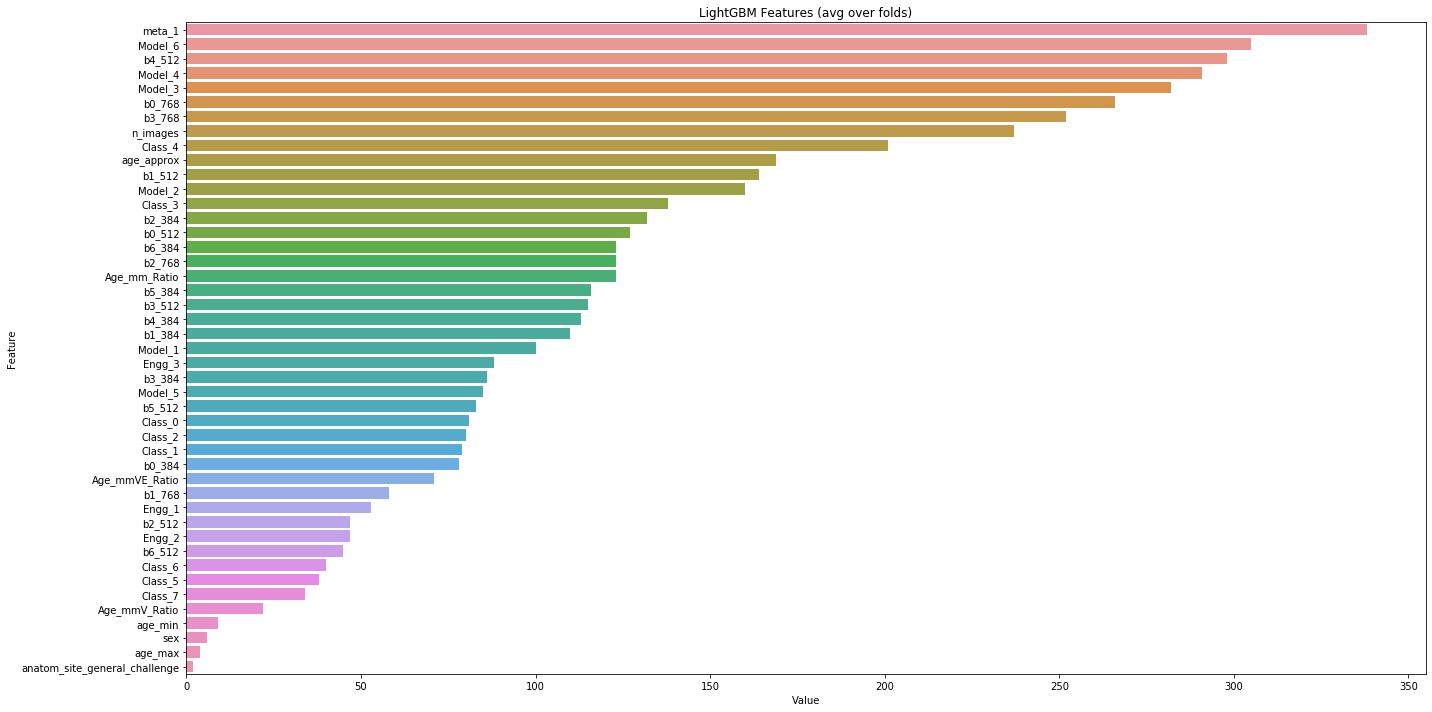

In [499]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(),trC_)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances-01.png')

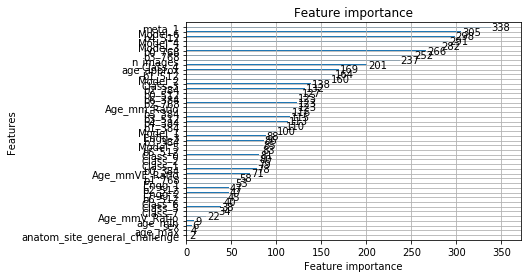

In [500]:
import matplotlib.pyplot as plt
lgb.plot_importance(model)
plt.show()

### XGBOOST

In [558]:
# !pip install xgboost --user

import xgboost as xgb

In [559]:
xgb_params =   {#'booster' : 'gbtree',
                'gpu_id':0,
                'tree_method':'gpu_hist',
                'eta' : 0.005,
                'objective' : 'binary:logistic',
                'nthread' : 4,
                'eval_metric': 'auc',
                'max_depth':7,
                'subsample' : 0.3,
                'colsample_bytree' : 0.3,
                'min_child_weight':15,
                'lambda':1.5,
                'alpha':1.75,
                'scale_pos_weight':3,
#                 'max_bin':500,
                'seed' : 42
               }

In [560]:
xg_out_OOF_v0 = np.zeros(len(DF_OOF))
xg_out_Preds_v0 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = xgb.DMatrix(data=TrX, label=TrY)
    valid_data = xgb.DMatrix(data=ValidX, label=ValidY)

    evals_results = {}
    model     = xgb.train(xgb_params,train_data, 
                              evals=[(train_data, 'train'), (valid_data, 'valid')],
                               num_boost_round=7500,
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    
    
    xg_out_OOF_v0[valIx] = model.predict(xgb.DMatrix(ValidX_))#[:,1]
    xg_out_Preds_v0 += model.predict(xgb.DMatrix(TeX))/5#[:,1]/5)
    
    
# print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,out_OOF)}")

II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,xg_out_OOF_v0[II])}")

[0]	train-auc:0.90629	valid-auc:0.88943
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.


C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


[500]	train-auc:0.96288	valid-auc:0.95416
[1000]	train-auc:0.96845	valid-auc:0.95417
Stopping. Best iteration:
[361]	train-auc:0.96101	valid-auc:0.95477

[0]	train-auc:0.91983	valid-auc:0.90135
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.96592	valid-auc:0.93171
[1000]	train-auc:0.97106	valid-auc:0.93247
Stopping. Best iteration:
[186]	train-auc:0.96150	valid-auc:0.93530

[0]	train-auc:0.91465	valid-auc:0.92782
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.96291	valid-auc:0.95376
[1000]	train-auc:0.96783	valid-auc:0.95430
[1500]	train-auc:0.97328	valid-auc:0.95390
Stopping. Best iteration:
[873]	train-auc:0.96630	valid-auc:0.95457

[0]	train-auc:0.90346	valid-auc:0.90060
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.


In [561]:
II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,xg_out_OOF_v0[II])}")

ROC AUC SCORE ON OOF 0.9432875667776969


In [562]:
xgb_params =   {#'booster' : 'gbtree',
                'gpu_id':0,
                'tree_method':'gpu_hist',
                'eta' : 0.005,
                'objective' : 'binary:logistic',
                'nthread' : 4,
                'eval_metric': 'auc',
                'max_depth':7,
                'subsample' : 0.3,
                'colsample_bytree' : 0.3,
                'min_child_weight':15,
                'lambda':1.5,
                'alpha':1.75,
                'scale_pos_weight':3,
#                 'max_bin':500,
                'seed' : 42
               }

In [563]:
xg_out_OOF_v1 = np.zeros(len(DF_OOF))
xg_out_Preds_v1 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = xgb.DMatrix(data=TrX, label=TrY)
    valid_data = xgb.DMatrix(data=ValidX, label=ValidY)

    evals_results = {}
    model     = xgb.train(xgb_params,train_data, 
                              evals=[(train_data, 'train'), (valid_data, 'valid')],
                               num_boost_round=750,
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    
    
    xg_out_OOF_v1[valIx] = model.predict(xgb.DMatrix(ValidX_))#[:,1]
    xg_out_Preds_v1 += model.predict(xgb.DMatrix(TeX))/5#[:,1]/5)
    
    
# print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,out_OOF)}")

II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,xg_out_OOF_v1[II])}")

[0]	train-auc:0.90629	valid-auc:0.88943
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.


C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


[500]	train-auc:0.96288	valid-auc:0.95416
[749]	train-auc:0.96567	valid-auc:0.95454
[0]	train-auc:0.91983	valid-auc:0.90135
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.96592	valid-auc:0.93171
[749]	train-auc:0.96835	valid-auc:0.93214
[0]	train-auc:0.91465	valid-auc:0.92782
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.96291	valid-auc:0.95376
[749]	train-auc:0.96532	valid-auc:0.95437
[0]	train-auc:0.90346	valid-auc:0.90060
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.96310	valid-auc:0.95206
[749]	train-auc:0.96580	valid-auc:0.95204
[0]	train-auc:0.90797	valid-auc:0.90207
Multiple eval metrics have been passed: 'valid-auc' will be used for 

In [564]:
xgb_params =   {#'booster' : 'gbtree',
                'gpu_id':0,
                'tree_method':'gpu_hist',
                'eta' : 0.005,
                'objective' : 'binary:logistic',
                'nthread' : 4,
                'eval_metric': 'auc',
                'max_depth':7,
                'subsample' : 0.3,
                'colsample_bytree' : 0.3,
                'min_child_weight':15,
                'lambda':1.5,
                'alpha':1.75,
                'scale_pos_weight':3,
#                 'max_bin':500,
                'seed' : 42
               }

In [565]:
xg_out_OOF_v2 = np.zeros(len(DF_OOF))
xg_out_Preds_v2 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = xgb.DMatrix(data=TrX, label=TrY)
    valid_data = xgb.DMatrix(data=ValidX, label=ValidY)

    evals_results = {}
    model     = xgb.train(xgb_params,train_data, 
                              evals=[(train_data, 'train'), (valid_data, 'valid')],
                               num_boost_round=600,
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    
    
    xg_out_OOF_v2[valIx] = model.predict(xgb.DMatrix(ValidX_))#[:,1]
    xg_out_Preds_v2 += model.predict(xgb.DMatrix(TeX))/5#[:,1]/5)
    
    
# print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,out_OOF)}")

II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,xg_out_OOF_v2[II])}")

[0]	train-auc:0.90629	valid-auc:0.88943
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.


C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


[500]	train-auc:0.96288	valid-auc:0.95416
[599]	train-auc:0.96394	valid-auc:0.95429
[0]	train-auc:0.91983	valid-auc:0.90135
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.96592	valid-auc:0.93171
[599]	train-auc:0.96704	valid-auc:0.93233
[0]	train-auc:0.91465	valid-auc:0.92782
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.96291	valid-auc:0.95376
[599]	train-auc:0.96388	valid-auc:0.95374
[0]	train-auc:0.90346	valid-auc:0.90060
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.96310	valid-auc:0.95206
[599]	train-auc:0.96425	valid-auc:0.95205
[0]	train-auc:0.90797	valid-auc:0.90207
Multiple eval metrics have been passed: 'valid-auc' will be used for 

In [566]:
xgb_params =   {#'booster' : 'gbtree',
                'gpu_id':0,
                'tree_method':'gpu_hist',
                'eta' : 0.005,
                'objective' : 'binary:logistic',
                'nthread' : 4,
                'eval_metric': 'auc',
                'max_depth':6,
                'subsample' : 0.3,
                'colsample_bytree' : 0.3,
                'min_child_weight':15,
                'lambda':1.5,
                'alpha':1.75,
                'scale_pos_weight':3,
#                 'max_bin':500,
                'seed' : 42
               }

In [567]:
xg_out_OOF_v3 = np.zeros(len(DF_OOF))
xg_out_Preds_v3 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = xgb.DMatrix(data=TrX, label=TrY)
    valid_data = xgb.DMatrix(data=ValidX, label=ValidY)

    evals_results = {}
    model     = xgb.train(xgb_params,train_data, 
                              evals=[(train_data, 'train'), (valid_data, 'valid')],
                               num_boost_round=500,
                                early_stopping_rounds=1000,
                               verbose_eval=600, feval=None)
    
    
    xg_out_OOF_v3[valIx] = model.predict(xgb.DMatrix(ValidX_))#[:,1]
    xg_out_Preds_v3 += model.predict(xgb.DMatrix(TeX))/5#[:,1]/5)
    
    
# print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,out_OOF)}")

II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,xg_out_OOF_v3[II])}")

[0]	train-auc:0.90629	valid-auc:0.88943
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.


C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


[499]	train-auc:0.96221	valid-auc:0.95422
[0]	train-auc:0.91978	valid-auc:0.90172
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[499]	train-auc:0.96541	valid-auc:0.93156
[0]	train-auc:0.91465	valid-auc:0.92782
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[499]	train-auc:0.96232	valid-auc:0.95377
[0]	train-auc:0.90346	valid-auc:0.90060
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[499]	train-auc:0.96258	valid-auc:0.95213
[0]	train-auc:0.90797	valid-auc:0.90207
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[499]	train-auc:0.96533	valid-auc:0.93478
ROC AUC SCORE ON OOF 0.9442153135871048


In [568]:
xgb_params =   {#'booster' : 'gbtree',
                'gpu_id':0,
                'tree_method':'gpu_hist',
                'eta' : 0.005,
                'objective' : 'binary:logistic',
                'nthread' : 4,
                'eval_metric': 'auc',
                'max_depth':7,
                'subsample' : 0.3,
                'colsample_bytree' : 0.3,
                'min_child_weight':17,
                'lambda':1.5,
                'alpha':1.75,
                'scale_pos_weight':3,
#                 'max_bin':500,
                'seed' : 42
               }

In [569]:
xg_out_OOF_v4 = np.zeros(len(DF_OOF))
xg_out_Preds_v4 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = xgb.DMatrix(data=TrX, label=TrY)
    valid_data = xgb.DMatrix(data=ValidX, label=ValidY)

    evals_results = {}
    model     = xgb.train(xgb_params,train_data, 
                              evals=[(train_data, 'train'), (valid_data, 'valid')],
                               num_boost_round=600,
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    
    
    xg_out_OOF_v4[valIx] = model.predict(xgb.DMatrix(ValidX_))#[:,1]
    xg_out_Preds_v4 += model.predict(xgb.DMatrix(TeX))/5#[:,1]/5)
    
    
# print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,out_OOF)}")

II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,xg_out_OOF_v4[II])}")

[0]	train-auc:0.90714	valid-auc:0.88991
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.


C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


[500]	train-auc:0.96160	valid-auc:0.95438
[599]	train-auc:0.96259	valid-auc:0.95455
[0]	train-auc:0.91969	valid-auc:0.90176
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.96453	valid-auc:0.93090
[599]	train-auc:0.96554	valid-auc:0.93234
[0]	train-auc:0.91487	valid-auc:0.92769
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.96164	valid-auc:0.95376
[599]	train-auc:0.96261	valid-auc:0.95377
[0]	train-auc:0.90404	valid-auc:0.90079
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.96189	valid-auc:0.95220
[599]	train-auc:0.96286	valid-auc:0.95212
[0]	train-auc:0.90753	valid-auc:0.90154
Multiple eval metrics have been passed: 'valid-auc' will be used for 

In [570]:
xgb_params =   {#'booster' : 'gbtree',
                'gpu_id':0,
                'tree_method':'gpu_hist',
                'eta' : 0.005,
                'objective' : 'binary:logistic',
                'nthread' : 4,
                'eval_metric': 'auc',
#                 'max_depth':7,
#                 'subsample' : 0.3,
#                 'colsample_bytree' : 0.3,
#                 'min_child_weight':17,
#                 'lambda':1.5,
#                 'alpha':1.75,
#                 'scale_pos_weight':3,
#                 'max_bin':500,
                'seed' : 42
               }

In [571]:
xg_out_OOF_v5 = np.zeros(len(DF_OOF))
xg_out_Preds_v5 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = xgb.DMatrix(data=TrX, label=TrY)
    valid_data = xgb.DMatrix(data=ValidX, label=ValidY)

    evals_results = {}
    model     = xgb.train(xgb_params,train_data, 
                              evals=[(train_data, 'train'), (valid_data, 'valid')],
                               num_boost_round=5000,
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    
    
    xg_out_OOF_v5[valIx] = model.predict(xgb.DMatrix(ValidX_))#[:,1]
    xg_out_Preds_v5 += model.predict(xgb.DMatrix(TeX))/5#[:,1]/5)
    
    
# print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,out_OOF)}")

II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,xg_out_OOF_v5[II])}")

[0]	train-auc:0.90063	valid-auc:0.91376
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.


C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


[500]	train-auc:0.97351	valid-auc:0.94895
[1000]	train-auc:0.99278	valid-auc:0.95273
[1500]	train-auc:0.99704	valid-auc:0.94885
Stopping. Best iteration:
[854]	train-auc:0.98937	valid-auc:0.95427

[0]	train-auc:0.92063	valid-auc:0.86328
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.98037	valid-auc:0.91766
[1000]	train-auc:0.99332	valid-auc:0.91813
[1500]	train-auc:0.99717	valid-auc:0.92591
[2000]	train-auc:0.99890	valid-auc:0.92772
[2500]	train-auc:0.99972	valid-auc:0.92622
Stopping. Best iteration:
[1800]	train-auc:0.99827	valid-auc:0.92782

[0]	train-auc:0.89777	valid-auc:0.87746
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.97338	valid-auc:0.94741
[1000]	train-auc:0.99131	valid-auc:0.95264
[1500]	train-auc:0.99688	valid-auc:0.95414
[2000]	train-auc:0.99

In [572]:
xgb_params =   {#'booster' : 'gbtree',
                'gpu_id':0,
                'tree_method':'gpu_hist',
                'eta' : 0.005,
                'objective' : 'binary:logistic',
                'nthread' : 4,
                'eval_metric': 'auc',
                'max_depth':7,
                'subsample' : 0.1,
                'colsample_bytree' : 0.1,
                'min_child_weight':17,
                'lambda':1.5,
                'alpha':1.75,
                'scale_pos_weight':3,
                'max_bin':500,
                'seed' : 42
               }

In [573]:
xg_out_OOF_v6 = np.zeros(len(DF_OOF))
xg_out_Preds_v6 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = xgb.DMatrix(data=TrX, label=TrY)
    valid_data = xgb.DMatrix(data=ValidX, label=ValidY)

    evals_results = {}
    model     = xgb.train(xgb_params,train_data, 
                              evals=[(train_data, 'train'), (valid_data, 'valid')],
                               num_boost_round=5000,
                                early_stopping_rounds=1000,
                               verbose_eval=500, feval=None)
    
    
    xg_out_OOF_v6[valIx] = model.predict(xgb.DMatrix(ValidX_))#[:,1]
    xg_out_Preds_v6 += model.predict(xgb.DMatrix(TeX))/5#[:,1]/5)
    
    
# print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,out_OOF)}")

II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,xg_out_OOF_v6[II])}")

[0]	train-auc:0.88436	valid-auc:0.84382
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.


C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


[500]	train-auc:0.94895	valid-auc:0.95328
[1000]	train-auc:0.95000	valid-auc:0.95319
Stopping. Best iteration:
[135]	train-auc:0.94480	valid-auc:0.95378

[0]	train-auc:0.88189	valid-auc:0.88508
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.95306	valid-auc:0.93108
[1000]	train-auc:0.95444	valid-auc:0.93164
Stopping. Best iteration:
[29]	train-auc:0.94764	valid-auc:0.93291

[0]	train-auc:0.84752	valid-auc:0.82788
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1000 rounds.
[500]	train-auc:0.94925	valid-auc:0.95102
[1000]	train-auc:0.95035	valid-auc:0.95251
[1500]	train-auc:0.95182	valid-auc:0.95310
[2000]	train-auc:0.95297	valid-auc:0.95319
[2500]	train-auc:0.95412	valid-auc:0.95293
Stopping. Best iteration:
[1748]	train-auc:0.95247	valid-auc:0.95345

[0]	train-auc:0.85202	valid-auc:0.83056

In [574]:
xgb_params =   {#'booster' : 'gbtree',
                'gpu_id':0,
                'tree_method':'gpu_hist',
                'eta' : 0.005,
                'objective' : 'binary:logistic',
                'nthread' : 4,
                'eval_metric': 'auc',
                'max_depth':7,
                'subsample' : 0.3,
                'colsample_bytree' : 0.3,
                'min_child_weight':15,
                'lambda':1.5,
                'alpha':1.75,
                'scale_pos_weight':3,
#                 'max_bin':500,
                'seed' : 42
               }

In [575]:
xg_out_OOF_v7 = np.zeros(len(DF_OOF))
xg_out_Preds_v7 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio',]+MoreCols
    
    TrX = DF_OOF.loc[trIx,trC_].values
    TrY = DF_OOF.loc[trIx,'target'].values
    
    ValidX_ = DF_OOF.loc[valIx,trC_].values
    ValidX = DF_OOF.loc[RealvalIx,trC_].values
    ValidY = DF_OOF.loc[RealvalIx,'target'].values
    
    TeX = DF_TEST.loc[:,trC_].values
    
    
    train_data = xgb.DMatrix(data=TrX, label=TrY)
    valid_data = xgb.DMatrix(data=ValidX, label=ValidY)

    evals_results = {}
    model     = xgb.train(xgb_params,train_data, 
                              evals=[(train_data, 'train'), (valid_data, 'valid')],
                               num_boost_round=750,
                                early_stopping_rounds=500,
                               verbose_eval=500, feval=None)
    
    
    xg_out_OOF_v7[valIx] = model.predict(xgb.DMatrix(ValidX_))#[:,1]
    xg_out_Preds_v7 += model.predict(xgb.DMatrix(TeX))/5#[:,1]/5)
    
    
# print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,out_OOF)}")

II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,xg_out_OOF_v7[II])}")

[0]	train-auc:0.90629	valid-auc:0.88943
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 500 rounds.


C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


[500]	train-auc:0.96288	valid-auc:0.95416
[749]	train-auc:0.96567	valid-auc:0.95454
[0]	train-auc:0.91983	valid-auc:0.90135
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 500 rounds.
[500]	train-auc:0.96592	valid-auc:0.93171
Stopping. Best iteration:
[186]	train-auc:0.96150	valid-auc:0.93530

[0]	train-auc:0.91465	valid-auc:0.92782
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 500 rounds.
[500]	train-auc:0.96291	valid-auc:0.95376
[749]	train-auc:0.96532	valid-auc:0.95437
[0]	train-auc:0.90346	valid-auc:0.90060
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 500 rounds.
[500]	train-auc:0.96310	valid-auc:0.95206
[749]	train-auc:0.96580	valid-auc:0.95204
[0]	train-auc:0.90797	valid-auc:0.90207
Multiple eval metrics have been passed: 'vali

In [592]:
# avgXGB = (1*xg_out_OOF_v0+0*xg_out_OOF_v1+1*xg_out_OOF_v2+1*xg_out_OOF_v3+1*xg_out_OOF_v4+1*xg_out_OOF_v5+1*xg_out_OOF_v6+1*xg_out_OOF_v7)/7
avgXGB = (0.5*xg_out_OOF_v0+1*xg_out_OOF_v1+2*xg_out_OOF_v2+
          2*xg_out_OOF_v3+5*xg_out_OOF_v4+1*xg_out_OOF_v5+
          xg_out_OOF_v6+2*xg_out_OOF_v7)/(0.5+1+2+2+5+1+1+2)

XGB_preds = (0.5*xg_out_Preds_v0+1*xg_out_Preds_v1+2*xg_out_Preds_v2+
          2*xg_out_Preds_v3+5*xg_out_Preds_v4+1*xg_out_Preds_v5+
          xg_out_Preds_v6+2*xg_out_Preds_v7)/(0.5+1+2+2+5+1+1+2)

print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,avgXGB[II])}")

ROC AUC SCORE ON OOF 0.9444820572100081


### Cat Boost

In [594]:
# !pip install catboost --user
from catboost import CatBoostClassifier

In [595]:
DF_OOF['age_approx'] = DF_OOF['age_approx'].astype(np.int32)
DF_TEST['age_approx'] = DF_OOF['age_approx'].astype(np.int32)

In [596]:
params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'verbose': 200, 
          'learning_rate':0.005,
          'iterations':5000,
          'early_stopping_rounds':500,
          'random_seed': 42,
          'use_best_model':True,
          'task_type': 'GPU',
           'devices':'0',
          'border_count': 254,
         }

In [597]:
cat_out_OOF_v0 = np.zeros(len(DF_OOF))
cat_out_Preds_v0 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#             'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#             'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
#           'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
        'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
        'Age_mmVE_Ratio','Class_4']+MoreCols
    
    categorical_features_indices = [DF_OOF[trC_].columns.get_loc(c) for c in ['sex','age_approx','anatom_site_general_challenge'] if c in df]
    
    TrX = DF_OOF.loc[trIx,trC_]
    TrY = DF_OOF.loc[trIx,'target']
    
    ValidX_ = DF_OOF.loc[valIx,trC_]
    ValidX = DF_OOF.loc[RealvalIx,trC_]
    ValidY = DF_OOF.loc[RealvalIx,'target']
    
    
    TeX = DF_TEST.loc[:,trC_]
    
    model = CatBoostClassifier(**params)
    
    model.fit(
        TrX, TrY,
        cat_features=categorical_features_indices,
        eval_set=(ValidX, ValidY))
  
    cat_out_OOF_v0[valIx] = model.predict_proba(ValidX_)[:,1]
    cat_out_Preds_v0 += model.predict_proba(TeX)[:,1]/5
    
    
# print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF_pseudo[DF_OOF_pseudo['Is 2020']==1].target,out_OOF)}")

II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,cat_out_OOF_v0[II])}")

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


0:	learn: 0.5802690	test: 0.5608954	best: 0.5608954 (0)	total: 45.5ms	remaining: 3m 47s
200:	learn: 0.6701150	test: 0.6608625	best: 0.6608625 (199)	total: 8.43s	remaining: 3m 21s
400:	learn: 0.8336890	test: 0.8551509	best: 0.8551509 (400)	total: 18.9s	remaining: 3m 36s
600:	learn: 0.9163776	test: 0.9391322	best: 0.9391322 (600)	total: 29s	remaining: 3m 32s
800:	learn: 0.9395881	test: 0.9479442	best: 0.9481960 (776)	total: 39.7s	remaining: 3m 28s
1000:	learn: 0.9446889	test: 0.9475105	best: 0.9482383 (878)	total: 50.5s	remaining: 3m 21s
1200:	learn: 0.9461618	test: 0.9480993	best: 0.9486216 (1155)	total: 1m 1s	remaining: 3m 13s
1400:	learn: 0.9470532	test: 0.9486632	best: 0.9487734 (1372)	total: 1m 11s	remaining: 3m 4s
1600:	learn: 0.9480033	test: 0.9496844	best: 0.9497153 (1587)	total: 1m 22s	remaining: 2m 55s
1800:	learn: 0.9485680	test: 0.9503263	best: 0.9503357 (1794)	total: 1m 33s	remaining: 2m 45s
2000:	learn: 0.9490682	test: 0.9505620	best: 0.9505660 (1997)	total: 1m 44s	remainin

1200:	learn: 0.9486268	test: 0.9280514	best: 0.9280753 (1086)	total: 59.2s	remaining: 3m 7s
1400:	learn: 0.9490586	test: 0.9278695	best: 0.9280753 (1086)	total: 1m 9s	remaining: 2m 58s
bestTest = 0.9280753136
bestIteration = 1086
Shrink model to first 1087 iterations.
ROC AUC SCORE ON OOF 0.9341297085287903


In [604]:
params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'verbose': 200, 
          'learning_rate':0.007,
          'iterations':2500,
          'early_stopping_rounds':250,
          'random_seed': 42,
          'use_best_model':True,
          'task_type': 'GPU',
           'devices':'0',
          'l2_leaf_reg':2,
          'border_count': 32,
          'depth':6,
          'min_data_in_leaf':700,
         }

In [605]:
cat_out_OOF_v1 = np.zeros(len(DF_OOF))
cat_out_Preds_v1 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio','Class_4']+MoreCols
    
    categorical_features_indices = [DF_OOF[trC_].columns.get_loc(c) for c in ['sex','age_approx','anatom_site_general_challenge'] if c in df]
    
    TrX = DF_OOF.loc[trIx,trC_]
    TrY = DF_OOF.loc[trIx,'target']
    
    ValidX_ = DF_OOF.loc[valIx,trC_]
    ValidX = DF_OOF.loc[RealvalIx,trC_]
    ValidY = DF_OOF.loc[RealvalIx,'target']
    
    
    TeX = DF_TEST.loc[:,trC_]
    
    model = CatBoostClassifier(**params)
    
    model.fit(
        TrX, TrY,
        cat_features=categorical_features_indices,
        eval_set=(ValidX, ValidY))
  
    cat_out_OOF_v1[valIx] = model.predict_proba(ValidX_)[:,1]
    cat_out_Preds_v1 += model.predict_proba(TeX)[:,1]/5
    
    
II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,cat_out_OOF_v1[II])}")

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


0:	learn: 0.5856349	test: 0.5608954	best: 0.5608954 (0)	total: 41.3ms	remaining: 1m 43s
200:	learn: 0.8256802	test: 0.8583582	best: 0.8583582 (200)	total: 9.51s	remaining: 1m 48s
400:	learn: 0.9066656	test: 0.9361626	best: 0.9361626 (400)	total: 20s	remaining: 1m 44s
600:	learn: 0.9418008	test: 0.9468451	best: 0.9486995 (559)	total: 30.3s	remaining: 1m 35s
800:	learn: 0.9451714	test: 0.9483491	best: 0.9496542 (659)	total: 41.2s	remaining: 1m 27s
bestTest = 0.9496542215
bestIteration = 659
Shrink model to first 660 iterations.
0:	learn: 0.5798592	test: 0.6019922	best: 0.6019922 (0)	total: 40.6ms	remaining: 1m 41s
200:	learn: 0.8448847	test: 0.7969007	best: 0.7969155 (195)	total: 9.37s	remaining: 1m 47s
400:	learn: 0.9114706	test: 0.8688374	best: 0.8693807 (394)	total: 20.1s	remaining: 1m 45s
600:	learn: 0.9457568	test: 0.9126292	best: 0.9126292 (600)	total: 30.9s	remaining: 1m 37s
800:	learn: 0.9510680	test: 0.9159832	best: 0.9160779 (778)	total: 41.8s	remaining: 1m 28s
1000:	learn: 0.9

In [606]:
params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'verbose': 200, 
          'learning_rate':0.007,
          'iterations':2500,
          'early_stopping_rounds':250,
          'random_seed': 42,
          'use_best_model':True,
          'task_type': 'GPU',
           'devices':'0',
          'l2_leaf_reg':2,
          'border_count': 32,
          'depth':10,
          'min_data_in_leaf':700,
         }

In [607]:
cat_out_OOF_v2 = np.zeros(len(DF_OOF))
cat_out_Preds_v2 = np.zeros(len(DF_TEST))

for fold in list(foldMapping.keys()):
    trIx = DF_OOF[~DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    valIx = DF_OOF[DF_OOF['tfrecord'].isin(foldMapping[fold])].index
    RealvalIx = DF_OOF.iloc[valIx,:][DF_OOF['Is 2020']==1].index
    
    trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
            'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
            'Age_mmVE_Ratio', 'Class_0','Class_1','Class_2','Class_3','Class_4',
          'Class_5','Class_6','Class_7','Engg_1','Engg_2','Engg_3']+MoreCols
    
    cats = ['sex','age_approx','anatom_site_general_challenge']
#     trC_ = ['sex','age_approx','anatom_site_general_challenge','age_min','age_max','n_images',
#         'Model_1','Model_2','Model_3','Model_4','Model_5','Model_6','Age_mm_Ratio','Age_mmV_Ratio',
#         'Age_mmVE_Ratio','Class_4']+MoreCols
    
    categorical_features_indices = [DF_OOF[trC_].columns.get_loc(c) for c in ['sex','age_approx','anatom_site_general_challenge'] if c in df]
    
    TrX = DF_OOF.loc[trIx,trC_]
    TrY = DF_OOF.loc[trIx,'target']
    
    ValidX_ = DF_OOF.loc[valIx,trC_]
    ValidX = DF_OOF.loc[RealvalIx,trC_]
    ValidY = DF_OOF.loc[RealvalIx,'target']
    
    
    TeX = DF_TEST.loc[:,trC_]
    
    model = CatBoostClassifier(**params)
    
    model.fit(
        TrX, TrY,
        cat_features=categorical_features_indices,
        eval_set=(ValidX, ValidY))
  
    cat_out_OOF_v2[valIx] = model.predict_proba(ValidX_)[:,1]
    cat_out_Preds_v2 += model.predict_proba(TeX)[:,1]/5
    
    
II = DF_OOF[DF_OOF['Is 2020']==1].index
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,cat_out_OOF_v2[II])}")

C:\Users\Anaconda_Stuff\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


0:	learn: 0.5856349	test: 0.5608954	best: 0.5608954 (0)	total: 40.1ms	remaining: 1m 40s
200:	learn: 0.8264777	test: 0.8582299	best: 0.8582299 (200)	total: 11.5s	remaining: 2m 11s
400:	learn: 0.9049867	test: 0.9346513	best: 0.9346513 (400)	total: 26s	remaining: 2m 16s
600:	learn: 0.9420989	test: 0.9452573	best: 0.9470680 (582)	total: 43s	remaining: 2m 16s
800:	learn: 0.9465015	test: 0.9473534	best: 0.9473668 (797)	total: 58.2s	remaining: 2m 3s
1000:	learn: 0.9479795	test: 0.9480483	best: 0.9480523 (999)	total: 1m 12s	remaining: 1m 48s
1200:	learn: 0.9491842	test: 0.9475722	best: 0.9481161 (1056)	total: 1m 26s	remaining: 1m 33s
bestTest = 0.9481160641
bestIteration = 1056
Shrink model to first 1057 iterations.
0:	learn: 0.5798592	test: 0.6019922	best: 0.6019922 (0)	total: 37.5ms	remaining: 1m 33s
200:	learn: 0.8421731	test: 0.7986422	best: 0.7986422 (200)	total: 10.8s	remaining: 2m 3s
400:	learn: 0.9150233	test: 0.8722129	best: 0.8722612 (398)	total: 23.6s	remaining: 2m 3s
600:	learn: 0.

In [618]:
avgCat = (4*cat_out_OOF_v0+cat_out_OOF_v1+0.5*cat_out_OOF_v2)/(4+1+0.5)
Cat_preds = (4*cat_out_Preds_v0+cat_out_Preds_v1+0.5*cat_out_Preds_v2)/(4+1+0.5)
print(f"ROC AUC SCORE ON OOF {roc_auc_score(DF_OOF[DF_OOF['Is 2020']==1].target,avgCat[II])}")

ROC AUC SCORE ON OOF 0.9345197336412296


In [ ]:
# submit = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input/sample_submission.csv')
# submit['target'] = new_out_Preds
# submit.to_csv(r'C:\Users\Kaggle\Melanoma\stacking\output/LGBM_Submit_AUC_{}.csv'.format(nn),index=False)

#### Avg of Ensembles

In [645]:
res = {}
for pk in np.arange(0.5,5,0.1):
    for cc in np.arange(0.05,1,0.1):
        for kk in np.arange(1,5,0.1):
            _ = (kk*avgLGB+pk*avgXGB+cc*avgCat)/(kk+pk+cc)
            nn = (round(roc_auc_score(DF_OOF.target,_),6))
            concat = str(pk)+"_"+str(cc)+"_"+str(kk)
            res[concat] = nn

In [646]:
sorted(res.items(), key=lambda x: -x[1])

[('1.8999999999999997_0.05_4.600000000000003', 0.945433),
 ('1.9999999999999996_0.05_4.800000000000003', 0.945433),
 ('1.6999999999999997_0.05_4.100000000000003', 0.945432),
 ('1.7999999999999998_0.05_4.5000000000000036', 0.945432),
 ('1.8999999999999997_0.05_4.700000000000003', 0.945432),
 ('1.9999999999999996_0.05_4.900000000000004', 0.945432),
 ('2.1999999999999997_0.05_4.900000000000004', 0.945432),
 ('1.4999999999999998_0.05_3.7000000000000024', 0.945431),
 ('1.5999999999999996_0.05_3.9000000000000026', 0.945431),
 ('1.6999999999999997_0.05_4.200000000000003', 0.945431),
 ('1.7999999999999998_0.05_4.400000000000003', 0.945431),
 ('1.9999999999999996_0.05_4.700000000000003', 0.945431),
 ('2.0999999999999996_0.05_4.700000000000003', 0.945431),
 ('2.0999999999999996_0.05_4.800000000000003', 0.945431),
 ('1.5999999999999996_0.05_4.000000000000003', 0.94543),
 ('1.7999999999999998_0.05_4.000000000000003', 0.94543),
 ('1.7999999999999998_0.05_4.3000000000000025', 0.94543),
 ('1.89999999

In [647]:
_ = (4.6*avgLGB+1.9*avgXGB+0.05*avgCat)/(4.6+1.9+0.05)
nn = (round(roc_auc_score(DF_OOF.target,_),6))
nn

0.945433

In [650]:
sub = (4.6*LGB_preds+1.9*XGB_preds+0.05*Cat_preds)/(4.6+1.9+0.05)

In [651]:
submit = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input/sample_submission.csv')
submit['target'] = sub
submit.to_csv(r'C:\Users\Kaggle\Melanoma\stacking\output/EnsembleAvg_LGBM_XGB_CatBoost_Submit_AUC_{}.csv'.format(nn),index=False)

In [652]:
import scipy

In [665]:
_ = (scipy.stats.rankdata(avgXGB,'average')+scipy.stats.rankdata(avgLGB,'average')+0.1*scipy.stats.rankdata(avgCat,'average'))/3
# t_ = (scipy.stats.rankdata(xg_out_Preds,'average')+scipy.stats.rankdata(out_Preds,'average')+scipy.stats.rankdata(cat_out_Preds,'average'))/3
# submit = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input/sample_submission.csv')
# submit['target'] = t_
# submit.to_csv(r'C:\Users\Kaggle\Melanoma\stacking\output/EnsembleAvg_LGBM_XGB_CatBoost_Submit_AUC_{}.csv'.format(nn),index=False)
nn = int(round(roc_auc_score(DF_OOF.target,_),4)*10000)
nn

9452

In [664]:
from scipy.stats import gmean
g_ = gmean(np.vstack((avgXGB,avgLGB,avgCat)),0)
nn = int(round(roc_auc_score(DF_OOF.target,_),4)*10000)
nn

# t_ = gmean(np.vstack((xg_out_Preds,out_Preds,cat_out_Preds)),0)
# submit = pd.read_csv(r'C:\Users\Kaggle\Melanoma\stacking\input/sample_submission.csv')
# submit['target'] = t_
# submit.to_csv(r'C:\Users\Kaggle\Melanoma\stacking\output/GMEAN_LGBM_XGB_CatBoost_Submit_AUC_{}.csv'.format(nn),index=False)


9440

In [663]:
from scipy.stats import hmean
h_ = hmean(np.vstack((avgXGB,avgLGB,avgCat)),0)
nn = int(round(roc_auc_score(DF_OOF.target,_),4)*10000)
nn

9440

In [660]:
tt = g_+h_
nn = int(round(roc_auc_score(DF_OOF.target,tt),4)*10000)
nn

9439